# importing liabries....

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# data_analysis.....


In [36]:
data=pd.read_csv('credit_card_fraud\creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# dataprepocessing.....

In [37]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [38]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

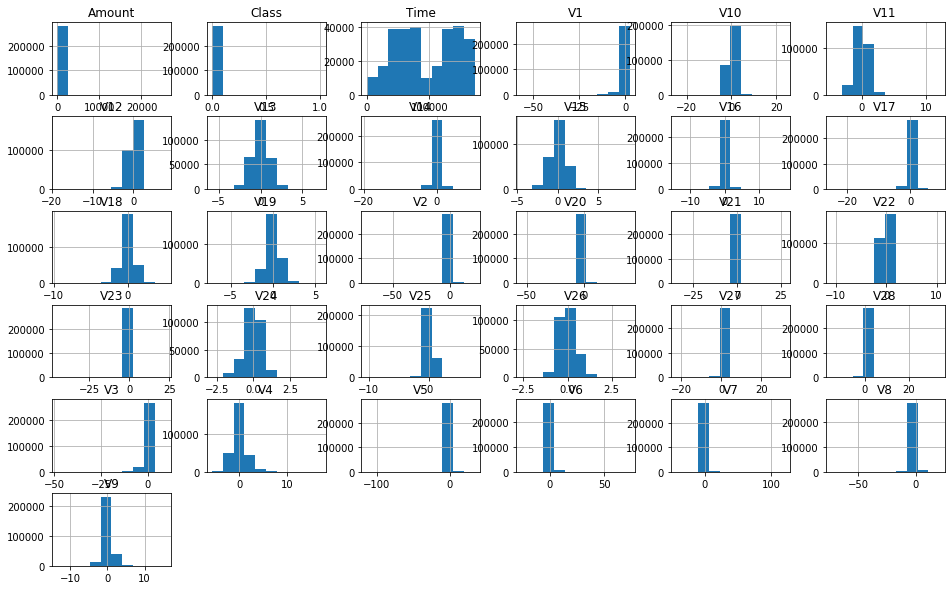

In [39]:
data.hist(figsize=(16,10))
plt.show()

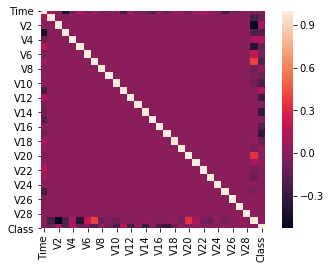

In [40]:
import seaborn as sns
sns.heatmap(data.corr(),square=True)
plt.show()

# data_training....

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop(columns=['Class']),data['Class'],test_size=0.2)

In [42]:
n_clusters = len(np.unique(y_train))
kmeans=KMeans(n_clusters=n_clusters)
kmeans.fit(x_train,y_train)

    

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
predict=kmeans.fit_predict(x_test)

In [44]:
predict

array([0, 0, 1, ..., 0, 1, 0])

In [13]:
set(predict)

{0, 1}

In [14]:
from sklearn.metrics import accuracy_score
print('accuracy',round(accuracy_score(y_test,predict)*100,4),'%')

accuracy 45.8973 %


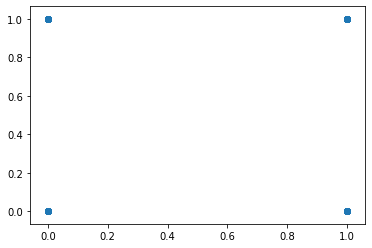

In [15]:
plt.scatter(y_test,predict)

In [ ]:
# supervised data.... local outlier factor.. data..

In [18]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop(columns=['Class']),data['Class'],test_size=0.2)

In [19]:
clf=LocalOutlierFactor(n_neighbors=20)
clf.fit(x_train,y_train)
predict1=clf.fit_predict(x_test)

In [20]:
set(predict1)

{-1, 1}

In [21]:
predict1[predict1==-1]=1
predict1[predict1==1]=0

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy',round(accuracy_score(y_test,predict1)*100,4),'%')

accuracy 99.8315 %


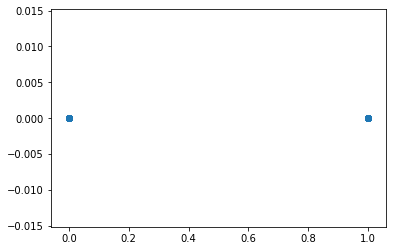

In [23]:
plt.scatter(y_test,predict1)

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10)
clf.fit(x_train,y_train)
predict2=clf.predict(x_test)

In [25]:
print('accuracy',round(accuracy_score(y_test,predict2)*100,4),'%')

accuracy 99.9526 %


In [ ]:
plt.scatter(y_test,predict2)

In [ ]:
decision tree classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
predict3=clf.predict(x_test)

In [27]:
print('accuracy',round(accuracy_score(y_test,predict3)*100,4),'%')

accuracy 99.9228 %


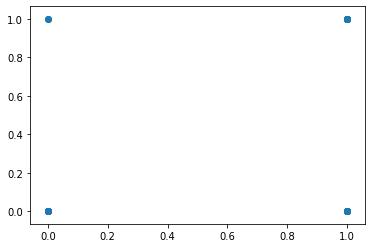

In [28]:
plt.scatter(y_test,predict2)

In [29]:
knearest neighbors_algorithm....

SyntaxError: invalid syntax (<ipython-input-29-e6689b2fbeea>, line 1)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
clf2 = KNeighborsClassifier()
clf2.fit(x_train, y_train)
predict4=clf2.predict(x_test)

In [31]:
print('accuracy',round(accuracy_score(y_test,predict4)*100,4),'%')

accuracy 99.8455 %


# evaluating.........

In [32]:
print('accuracy',round(accuracy_score(y_test,predict)*100,4),'%,kmeans_classifier')
print('accuracy',round(accuracy_score(y_test,predict1)*100,4),'%,local_outlier_classifier')
print('accuracy',round(accuracy_score(y_test,predict2)*100,4),'%,random_forest')
print('accuracy',round(accuracy_score(y_test,predict3)*100,4),'%,decision_tree')
print('accuracy',round(accuracy_score(y_test,predict4)*100,4),'%,knearest neighbors')

accuracy 45.8253 %,kmeans_classifier
accuracy 99.8315 %,local_outlier_classifier
accuracy 99.9526 %,random_forest
accuracy 99.9228 %,decision_tree
accuracy 99.8455 %,knearest neighbors


In [33]:
###confusion matrix....
print('confusion matrix\n',confusion_matrix(y_test,predict),'kmeans_classifier')
print('confusion matrix\n',confusion_matrix(y_test,predict1),'local_outlier_classifier')
print('confusion matrix\n',confusion_matrix(y_test,predict2),'random_forest')
print('confusion matrix\n',confusion_matrix(y_test,predict3),'decision_tree')
print('confusion matrix\n',confusion_matrix(y_test,predict4),'knearest neighbors')



confusion matrix
 [[26058 30808]
 [   51    45]] kmeans_classifier
confusion matrix
 [[56866     0]
 [   96     0]] local_outlier_classifier
confusion matrix
 [[56864     2]
 [   25    71]] random_forest
confusion matrix
 [[56844    22]
 [   22    74]] decision_tree
confusion matrix
 [[56865     1]
 [   87     9]] knearest neighbors


# conclusion....

In [ ]:
RandomForestClassifier is the best classifier for this data..with accuracy 99.95%
and 
confusion matrix
 [[56868     1]
 [   26    67]] random_forest
confusion matrix